# HEART DISEASE PREDICTION MODEL
### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [15]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### IMPORT THE DATASET

In [2]:
df=pd.read_csv("heart.csv")
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [4]:
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(1025, 14)

### FEATURE SELECTION AND SPLITTING THE DATASET

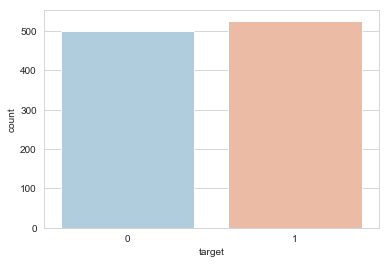

In [8]:
#To check whether the data set is balanced or not
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [42]:
y=df['target']
X=df.drop(['target'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [43]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [44]:
X_train.shape

(820, 13)

In [45]:
X_test.shape

(205, 13)

In [46]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

### K Neighbour Classifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

In [23]:
print("KNN_accuracy:",knn_ac)

KNN_accuracy: 1.0


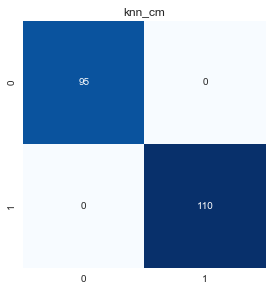

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("knn_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

### Naive Bayes Classifier

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [26]:
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

In [27]:
print("Bayes_accuracy:",bayes_ac)

Bayes_accuracy: 0.8536585365853658


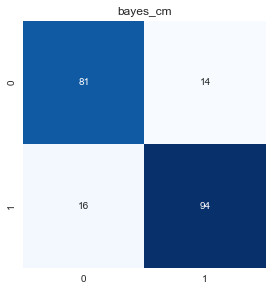

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

### Random Forest Classifier

In [29]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [30]:
print("RandomForest_accuracy:",rdf_ac)

RandomForest_accuracy: 1.0


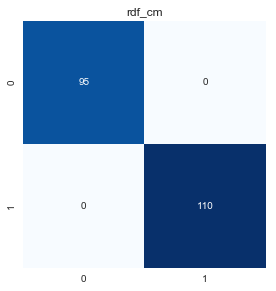

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

### DecisionTree Classifier

In [32]:
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,rdf_pred)
dtree_ac=accuracy_score(rdf_pred,y_test)

In [33]:
print("DecisionTree_accuracy:",dtree_ac)

DecisionTree_accuracy: 1.0


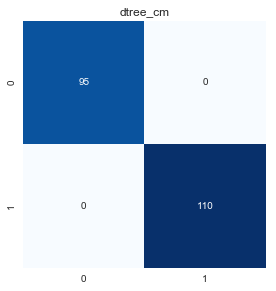

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

### PREDICTION ON A NEW FEATURE

In [47]:
dtree_c.predict([[62,0,0,138,294,1,1,106,0,1.9,1,3,2]])

array([0], dtype=int64)

In [48]:
rdf_c.predict([[62,0,0,138,294,1,1,106,0,1.9,1,3,2]])

array([0], dtype=int64)

In [49]:
gaussian.predict([[62,0,0,138,294,1,1,106,0,1.9,1,3,2]])

array([1], dtype=int64)

In [50]:
knn.predict([[62,0,0,138,294,1,1,106,0,1.9,1,3,2]])

array([1], dtype=int64)

In [51]:
rdf_c.predict([[58,0,0,100,248,0,0,122,0,1.0,1,0,2]]) 

array([0], dtype=int64)

In [52]:
dtree_c.predict([[12,0,0,138,294,0,0,106,0,1.9,1,3,2]])

array([0], dtype=int64)